### Will a Customer Accept the Coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**


This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)

3. Coupon attributes
    - time before it expires: 2 hours or one day

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [248]:
data = pd.read_csv('C:/Users/fz8fd2/Downloads/test/data/coupons.csv')

In [249]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [250]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


3. Decide what to do about your missing data -- drop, replace, other...

In [251]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [124]:
#drop 'car' column it is mostly null
df = data.drop('car',axis=1)

In [125]:
df['CarryAway'].unique()

array([nan, '4~8', '1~3', 'gt8', 'less1', 'never'], dtype=object)

In [126]:
df.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [127]:
#drop rows that have nan, since there is still lots of data available
#original data set has 12684 rows
df1 = df.dropna()
df1
#a clean set of data with no NaN contains 12079 rows. We ratained 95.2% rows even after cleanup

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



In [128]:
df1['Y'].mean()
#56.9% of the total population accepted the coupon

0.5693352098683666

5. Use a bar plot to visualize the `coupon` column.

<AxesSubplot:xlabel='Y', ylabel='coupon'>

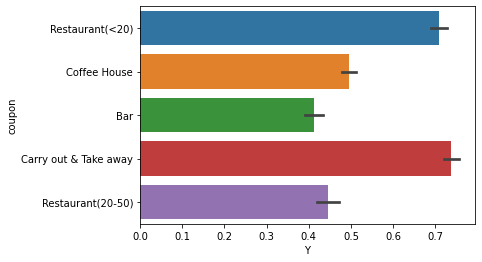

In [253]:
sns.barplot(data=df1,x='Y', y='coupon')
#Carry out/takeway and Restaurant(<20) had more acceptance of coupon

6. Use a histogram to visualize the temperature column.

temperature  Y
30           1    1179
             0    1016
55           1    1967
             0    1695
80           1    3731
             0    2491
Name: Y, dtype: int64
temperature
30    0.537130
55    0.537138
80    0.599646
Name: Y, dtype: float64
1    6877
0    5202
Name: Y, dtype: int64


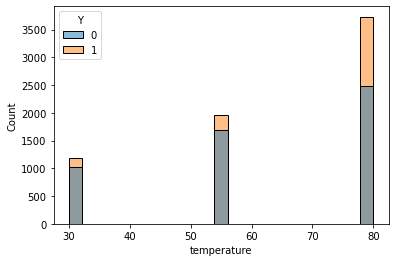

In [130]:
sns.histplot(data=df1,x='temperature',hue=df1['Y'])
print(df1.groupby('temperature')['Y'].value_counts())
print(df1.groupby('temperature')['Y'].mean())

print(df1['Y'].value_counts())
#when temperature is 80 degrees, there are more coupons accepted

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [169]:
df2 = df1[df1['coupon'].str.contains('Bar')]
df2

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [170]:
df2['Y'].mean()
#41% of bar coupons were accepted

0.41191845269210664

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [172]:
ar3orless = df2[df2['Bar'].str.contains('never') | df2['Bar'].str.contains('less1') | df2['Bar'].str.contains('1~3')]['Y'].mean()
print(ar3orless)
arMorethan3 =  df2[df2['Bar'].str.contains('4~8') | df2['Bar'].str.contains('gt8')]['Y'].mean()
print(arMorethan3)

#acceptance rate is much higher at 76% for people who visited a more more than 3 times a month

0.37267441860465117
0.7616580310880829


In [175]:
#df2['age'] = pd.to_numeric(df2['age'])
print(df2['age'].unique())
print(df2['Bar'].unique())
#setting age to 20, for people below 21 and age to 50, for age 50 plus

[21 46 26 31 41 50 36 20]
['never' 'less1' '1~3' 'gt8' '4~8']


In [174]:
df2.loc[df2['age'] == "below21", 'age'] = 20
df2.loc[df2['age'] == "50plus", 'age'] = 50
df2.loc[df2['age'] == "21", 'age'] = 21
df2.loc[df2['age'] == "46", 'age'] = 46
df2.loc[df2['age'] == "26", 'age'] = 26
df2.loc[df2['age'] == "31", 'age'] = 31
df2.loc[df2['age'] == "36", 'age'] = 36
df2.loc[df2['age'] == "41", 'age'] = 41

C:\Users\fz8fd2\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [145]:
df2.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                      int64
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [176]:
df2['age'] = pd.to_numeric(df2['age'])

C:\Users\fz8fd2\AppData\Local\Temp/ipykernel_9448/994439535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['age'] = pd.to_numeric(df2['age'])


In [185]:
df2['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [192]:
#prob of accepting coupon, if age >=25 and they go to bar more than once per month
ar1 = df2[
    (df2['age'] > 25) & 
           (df2['Bar'].str.contains("1~3") | df2['Bar'].str.contains('4~8') | df2['Bar'].str.contains('gt8')) 
             ]['Y'].mean()

print(ar1)

#prob of accepting coupon, if age >=25 and they go to bar less than once per month
#plus
#prob of accepting coupon, if age < 25 

ar2 = df2[
    ((df2['age'] > 25) &
    (df2['Bar'].str.contains('less1') | df2['Bar'].str.contains('never'))) |
    ((df2['age'] <= 25))
]['Y'].mean()
     
print(ar2)

#answer 4: 69% chance of accepting coupon if over 25 and they go to bar more than once per month. 34% chance of accepting 
#coupon for others


0.6898263027295285
0.33774834437086093


5. Construct a null and alternative hypothesis for the difference between groups of drivers who go to a bar more than once a month and are over the age of 25 to all other drivers. 

In [193]:
#null hypothesis : Accepting coupon when users go to bar more than once and their age is over 25 is same as all other drivers
#alternate hypothesis : people who visit a bar more than once and are aged over 25 is more likely to accept coupon

6. Using alpha at 0.05 test your hypothesis and state your conclusion.

Mean accept when age over 25 and visit bar more than once per month: 0.6898263027295285
Mean accept when age over 25 and visit bar less than once per month or age less than 25: 0.33774834437086093
meanAccept1 std value: 0.4625645628364088
meanAccept2 std value: 0.4729422800359561
p-value nan
we accept null hypothesis


C:\Users\fz8fd2\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\fz8fd2\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


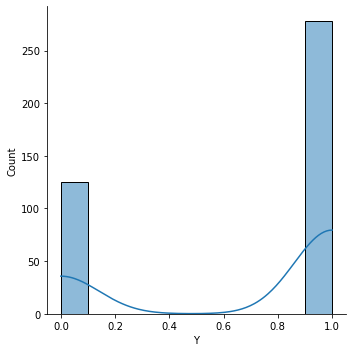

In [220]:
from scipy.stats import ttest_ind

df_n = df2[
    (df2['age'] > 25) & 
           (df2['Bar'].str.contains("1~3") | df2['Bar'].str.contains('4~8') | df2['Bar'].str.contains('gt8')) 
             ]

meanAccept1 = np.mean(df_n['Y'])

df_a = df2[
    ((df2['age'] > 25) &
    (df2['Bar'].str.contains('less1') | df2['Bar'].str.contains('never'))) |
    ((df2['age'] <= 25))
]
meanAccept2 = np.mean(df_a['Y'])

print("Mean accept when age over 25 and visit bar more than once per month:",meanAccept1)
print("Mean accept when age over 25 and visit bar less than once per month or age less than 25 and accept coupon:",meanAccept2)

meanAccept1_std = np.std(df_n['Y'])
meanAccept2_std = np.std(df_a['Y'])

print("meanAccept1 std value:",meanAccept1_std)
print("meanAccept2 std value:",meanAccept2_std)

ttest,pval = ttest_ind(meanAccept1_std,meanAccept2_std)

print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

sns.displot(df_n['Y'], kde=True)

In [221]:
#the above plot shows that the data is not normally distributed, hence ttest is not valid and p_value is nan

7. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [280]:
df_1 = df2[
    (
    ((df2['passanger'] == 'Friends(s)') | (df2['passanger'] == 'Partner')) &
    (df2['occupation'] != 'Farming Fishing & Forestry') &
    (df2['Bar'].str.contains("1~3") | df2['Bar'].str.contains('4~8') | df2['Bar'].str.contains('gt8')) 
    )
]
print(df_1['Y'].mean())

0.6027397260273972


8. Compare the acceptance rates between those passengers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [259]:
df_1 = df2[
    (
    ((df2['passanger'] == 'Friends(s)') | (df2['passanger'] == 'Partner')) & 
    (df2['maritalStatus'] != 'Widowed') &
           (df2['Bar'].str.contains("1~3") | df2['Bar'].str.contains('4~8') | df2['Bar'].str.contains('gt8')) 
    )
             ]
print(df_1['Y'].mean())

df_2 = df2[
    (
    (df2['age'] < 30) &
           (df2['Bar'].str.contains("1~3") | df2['Bar'].str.contains('4~8') | df2['Bar'].str.contains('gt8'))
    )
    ]
print(df_2['Y'].mean())

df_3 = df2[
    (
    ((df2['income'] < 'Less than $12500') | (df2['income'] < '$12500 - $24999') | (df2['income'] < '$25000 - $49999')) &
           ((df2['RestaurantLessThan20'] == "4~8") | (df2['RestaurantLessThan20'] == 'gt8'))
           )
    ]
print(df_3['Y'].mean())

0.6027397260273972
0.7195121951219512
0.4281391830559758


9.  Based on these observations, what do you hypothesize about passengers who accepted the bar coupons?

In [ ]:
#young folks who are less than 30 years old and who go to bars more than once a month accept coupons more often. 72%
#followed colosely by folks who are in the car with partner or friends, and they visit bars more than once a month, accept coupons

In [235]:
df2['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [286]:
df3 = df1[df1['coupon'] == 'Carry out & Take away']
#getting a new dataframe of carry out and take away coupon for further analysis

['Carry out & Take away']


In [290]:
#What % of people accept carry out and take away coupons
print(df3['Y'].value_counts())
df3['Y'].mean()
#74% of people accept carry out coupons when offered

1    1682
0     598
Name: Y, dtype: int64


0.737719298245614

<AxesSubplot:xlabel='Y', ylabel='occupation'>

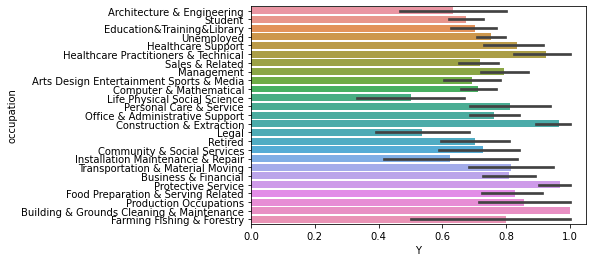

In [292]:
#plot a bar chart of accept vs not accept for each income level for carry out
sns.barplot(data=df3,x="Y",y=df3['occupation'])

In [293]:
#Plot the same plot for top 5 occupations, excluding unemployed
print(df3['occupation'].value_counts())

Unemployed                                   347
Student                                      295
Computer & Mathematical                      254
Sales & Related                              198
Education&Training&Library                   164
Management                                   136
Office & Administrative Support              118
Arts Design Entertainment Sports & Media     101
Business & Financial                          99
Retired                                       84
Food Preparation & Serving Related            58
Healthcare Support                            48
Community & Social Services                   44
Legal                                         41
Healthcare Practitioners & Technical          40
Transportation & Material Moving              38
Personal Care & Service                       32
Protective Service                            31
Architecture & Engineering                    30
Life Physical Social Science                  30
Construction & Extra

In [311]:
top_5_occupations = {'Student', 'Computer & Mathematical','Sales & Related', 'Education&Training&Library', 'Management'}
df4 = df3[df3['occupation'].isin(top_5_occupations)]

<AxesSubplot:xlabel='Y', ylabel='occupation'>

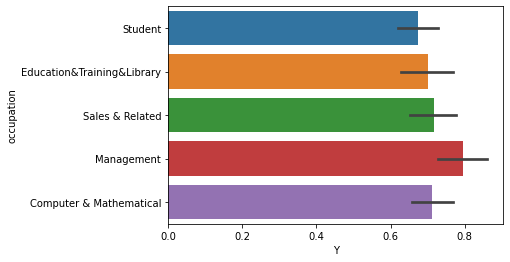

In [312]:
sns.barplot(data=df3,x="Y",y=df4['occupation'])
#80% of the take away coupons issued to management is accepted

In [333]:
print(df3[df3['occupation'] == 'Unemployed']['Y'].value_counts())
#assumed unemployed folks would not use carry out coupons, instead would cook at homw. But that is not the case.

1    261
0     86
Name: Y, dtype: int64
